# DAI 6.4 Supervised Machine Learning: Regression

### This script contains the following:
  1. Importing libraries and data
  2. Data Cleaning
  3. Data prep for regression analysis
  4. Regression analysis


### 1. Importing Libraries and Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Set Path
path = r'/Volumes/Get to Work/Data Analytics Course 2025/Personal Project'

In [12]:
# Import Data
df = pd.read_csv('merged_home_income.csv')

## 2. Data Cleaning

In [17]:
df.columns

Index(['County', 'State', 'Year', 'Home Value', 'Income per Capita'], dtype='object')

In [19]:
df.head()

,County,State,Year,Home Value,Income per Capita
0,Abbeville County,SC,2000,50121,23401
1,Abbeville County,SC,2001,52615,23029
2,Abbeville County,SC,2002,60726,21383
3,Abbeville County,SC,2003,64416,20250
4,Abbeville County,SC,2004,68112,21646


In [21]:
df.shape

(48540, 5)

In [23]:
# Check for missing values
df.isnull().sum()

County               0
State                0
Year                 0
Home Value           0
Income per Capita    0
dtype: int64

No missing values

In [28]:
# Check for duplicates
dups = df.duplicated()

No duplicates

In [31]:
df ['Home Value'].mean() #Check for the mean

173666.63001648124

In [33]:
df ['Income per Capita'].mean() #Check for the mean

39532.35105067985

## Hypothesis: As the years increase, so does the Home Value

## 3. Data prep for regression analysis

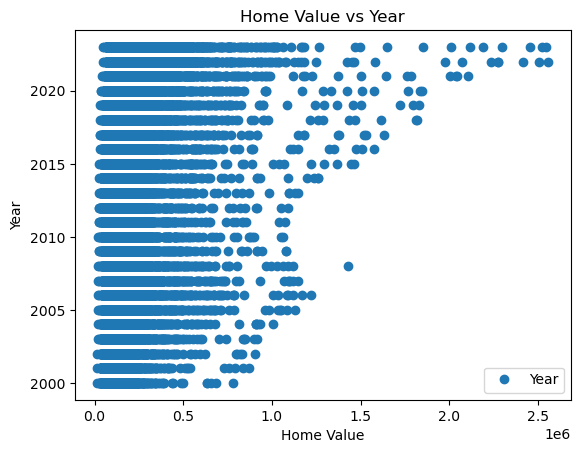

In [97]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Home Value', y='Year',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Home Value vs Year')  
plt.xlabel('Home Value')  
plt.ylabel('Year')  
plt.show()

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Home Value'].values.reshape(-1,1)
y = df['Year'].values.reshape(-1,1)

In [54]:
X

array([[ 50121],
       [ 52615],
       [ 60726],
       ...,
       [154648],
       [155962],
       [136595]])

In [56]:
y

array([[2000],
       [2001],
       [2002],
       ...,
       [2021],
       [2022],
       [2023]])

In [58]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [60]:
# Create a regression object.

Regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

Regression.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predict the values of y using X.

y_predicted = Regression.predict(X_test)

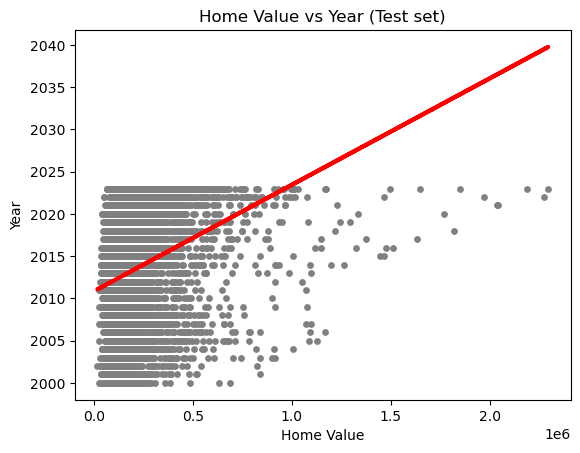

In [95]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Home Value vs Year (Test set)')
plot_test.xlabel('Home Value')
plot_test.ylabel('Year')
plot_test.show()

In [91]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [74]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,Regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.25806408e-05]]
Mean squared error:  39.8020199885579
R2 score:  0.060162005688797815


### This test scatter plot shows a positive relationship and a positive slope coefficient of 1.26. I.e. As the years (y) increase, so does the Home Value (X). However, the R2 score is only 6 percent, which indicates that the test isn't a great fit

In [76]:
y_predicted

array([[2012.75447057],
       [2015.94001462],
       [2012.17596238],
       ...,
       [2011.72093319],
       [2012.14769368],
       [2011.9140586 ]])

In [78]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2012,2012.754471
1,2015,2015.940015
2,2020,2012.175962
3,2018,2011.794593
4,2023,2013.326059
5,2017,2012.764661
6,2015,2013.350780
7,2018,2016.214046
8,2004,2012.010288
9,2007,2013.644236


### The table above confirms the misfit as well. 

#### Compare how the regression fits the training set

In [81]:
# Predict.

y_predicted_train = Regression.predict(X_train) # This is predicting X_train!

In [83]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [87]:
print('Slope:' ,Regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.25806408e-05]]
Mean squared error:  39.87702449680335
R2 score:  0.06310491848709343


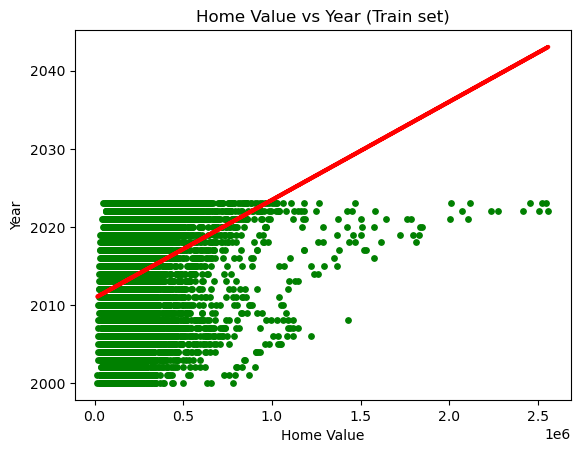

In [93]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Home Value vs Year (Train set)')
plot_test.xlabel('Home Value')
plot_test.ylabel('Year')
plot_test.show()

### Although, the scatterplot confirms a positive slope between the years and home value, the Regression doesn't fit the training set based on the analysis and notes above.We would probably need review for outliers or consider multiple variables for a propert fit